# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Load the data

First let's load the data and set some overall styles for our visualisations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up global styles for plots
plt.style.use('fivethirtyeight')
sns.set_context("notebook", font_scale=1)

# load the data
hotels = pd.read_csv("../data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## Data Cleaning

Before we being to analyse the data let's first:

* Explore
* Clean 
* Verify

In [2]:
# rename 'Booking_ID' column to 'booking_id' for consistency
hotels.rename(columns={'Booking_ID': 'booking_id'}, inplace=True)
# confirm
display(hotels.columns)

Index(['booking_id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [3]:
# let's see what the shape of the data is
hotels.shape

(36275, 19)

In [4]:
# check for missing values
hotels.isnull().sum()

booking_id                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [5]:
# first let's remove any rows where least 17 values are missing
hotels.dropna(thresh=17, inplace=True)
# confirm
hotels.shape

(35358, 19)

In [6]:
# check percentage of missing values
def get_percentage_of_missing_values(df):
    return round(df.isnull().sum()/len(df) * 100, 1)
    
display(get_percentage_of_missing_values(hotels))

booking_id                              0.0
no_of_adults                            0.6
no_of_children                          0.5
no_of_weekend_nights                    0.7
no_of_week_nights                       1.8
type_of_meal_plan                       1.1
required_car_parking_space              6.2
room_type_reserved                      2.7
lead_time                               0.9
arrival_year                            0.5
arrival_month                           0.6
arrival_date                            2.6
market_segment_type                     2.8
repeated_guest                          1.1
no_of_previous_cancellations            1.3
no_of_previous_bookings_not_canceled    0.8
avg_price_per_room                      1.2
no_of_special_requests                  1.7
booking_status                          0.0
dtype: float64

In [7]:
# let's take these missing values and replace them appropriately
# a few numerical columns have a very small percentage of missing values, 
# and a small range of possible values, so we can replace them with the 
# most frequent value in that column (the mode)
cols = [
    'no_of_adults', 
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights'
]

for col in cols:
    hotels[col].fillna(hotels[col].mode()[0], inplace=True)

In [8]:
# next let's replace numerical columns with the mean
cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests'    
]
for col in cols:
    hotels[col].fillna(hotels[col].mean(), inplace=True)

# next let's replace categorical columns with the most used value
cols = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type'
]
for col in cols:
    hotels[col].fillna(hotels[col].value_counts().index[0], inplace=True)

# replace null booleans with False
cols = [
    'required_car_parking_space',
    'repeated_guest'
]
for col in cols:
    hotels[col].fillna(False, inplace=True)

# replace null dates with ffill
cols = [
    'arrival_date',
    'arrival_year',
    'arrival_month'
]
for col in cols:
    hotels[col].fillna(method='ffill', inplace=True)

# confirm changes
display(get_percentage_of_missing_values(hotels))


booking_id                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [9]:
# next check data types of columns are as expected
display(hotels.dtypes)

booking_id                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space               object
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                           object
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                           object
dtype: object

In [10]:
# change multiple float columns to int, except avg_price_per_room
cols = [
    'no_of_special_requests',
    'no_of_children',
    'no_of_adults',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests'
]
for col in cols:
    hotels[col] = hotels[col].astype(int)

# confirm changes
display(hotels.dtypes)
display(hotels.head())


booking_id                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [11]:
# check for any duplicate rows
hotels.duplicated().sum()

0

In [12]:
# let's loop around and check the categorical columns are consistent
cols = [
    'booking_status',
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type'
]
for col in cols:
    print(col)
    print(hotels[col].value_counts())

booking_status
Not_Canceled    23775
Canceled        11583
Name: booking_status, dtype: int64
type_of_meal_plan
Meal Plan 1     27214
Not Selected     4943
Meal Plan 2      3196
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
room_type_reserved
Room_Type 1    27650
Room_Type 4     5732
Room_Type 6      914
Room_Type 2      652
Room_Type 5      252
Room_Type 7      152
Room_Type 3        6
Name: room_type_reserved, dtype: int64
market_segment_type
Online           23000
Offline           9964
Corporate         1900
Complementary      372
Aviation           122
Name: market_segment_type, dtype: int64


## Analysis

Now we have the data cleaned, let's do some analysis to understand more about fulfilment and cancellations.

We are going to ask 2 questions:
* Can we predict the outcome of a booking using machine learning models?
* Can we forecast cancellations over time using time series analysis?

To make looking at the data time series easier, let's add an extra date column to the dataset and add it to the dataframe.

In [13]:
# let's add a date column composed of the arrival_year, arrival_month and arrival_date
hotels = hotels.rename(columns={
    'arrival_year': 'year',
    'arrival_month': 'month',
    'arrival_date': 'day'
})
# some of the day values are invalid for the month, so we'll coerce them to NaT
hotels['date'] = pd.to_datetime(hotels[['year', 'month', 'day']], errors='coerce')
# there's 52 invalid dates
display(hotels['date'].isnull().sum())
# fix invalid date with ffills
hotels['date'].fillna(method='ffill', inplace=True)
# confirm
display(get_percentage_of_missing_values(hotels))
display(hotels.head())


52

booking_id                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
year                                    0.0
month                                   0.0
day                                     0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
date                                    0.0
dtype: float64

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled,2018-09-13


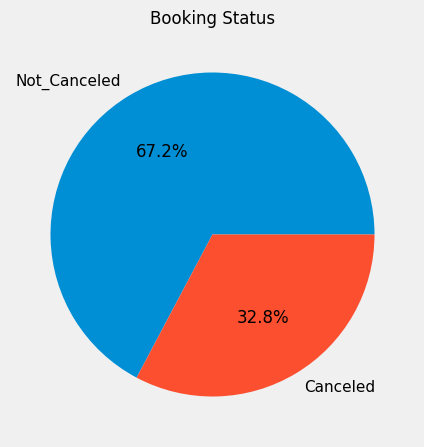

In [14]:
# plot booking status in a pie chart
plt.figure(figsize=(5, 5))
plt.pie(hotels['booking_status'].value_counts(), labels=hotels['booking_status'].value_counts().index, autopct='%1.1f%%')
plt.title('Booking Status')
plt.show()

Observations from this graph - we have a good enough distribution of cancelled and not cancelled bookings to use as the foundation for a model.

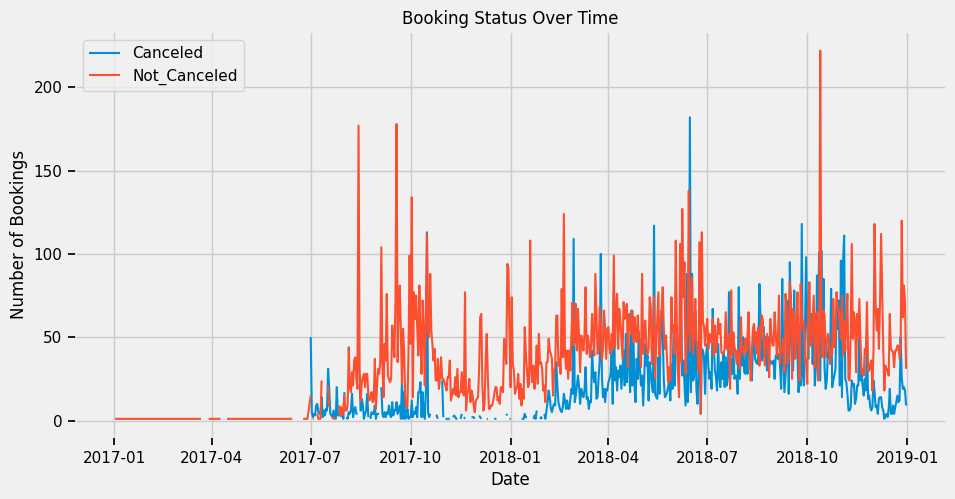

In [15]:
# plot cancelled or not cancelled booking status over time in a line chart
def plot_bookings_over_time(df):
    bookings_over_time = df.groupby('date')['booking_status'].value_counts().unstack()
    plt.figure(figsize=(10, 5))
    plt.plot(bookings_over_time.index, bookings_over_time['Canceled'])
    plt.plot(bookings_over_time.index, bookings_over_time['Not_Canceled'])
    plt.legend(['Canceled', 'Not_Canceled'])
    plt.title('Booking Status Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Bookings')
    plt.show()

plot_bookings_over_time(hotels)

Observations from this graph:

* Visually it looks as though numbers of booking cancelled might have a relation to numbers not cancelled. We will explore this further.
* Data before 2017-07 is minimal, so we will remove those data points before progressing.

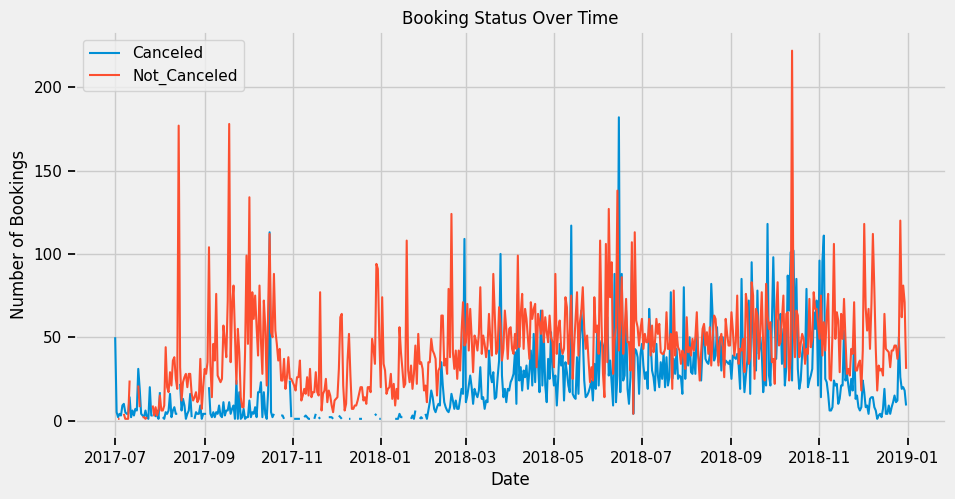

In [16]:
# remove bookings before 2017-07-01 from hotels dataframe
hotels = hotels[hotels['date'] >= '2017-07-01']
# verify
plot_bookings_over_time(hotels)

## Models

### Data Preperation

Let's prepare the data so it is suitable for model training.

In [17]:
from sklearn.preprocessing import LabelEncoder

# prepare the hotels data for binary logistic regression
# drop the year, month, day and booking_id columns
hotels_numerical = hotels.drop(
    columns=[
        'year', 
        'month', 
        'day', 
        'booking_id',
        'date'
    ]
)

# create a LabelEncoder object
label_encoder = LabelEncoder()

# encode the 'booking_status' column - Not Canceled = 1, Canceled = 0
hotels_numerical['booking_status'] = label_encoder.fit_transform(
    hotels_numerical['booking_status']
)

# replace categorical columns with one-hot encoded columns
hotels_numerical = pd.get_dummies(hotels_numerical, columns=[
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type'
])

display(hotels_numerical.dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1             uint8
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 1            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_Type 4            uint8
room_type_reserved_Room_Type 5          

In [18]:
from sklearn.model_selection import train_test_split

# prepare test and train data, with the booking_status column as the target
X = hotels_numerical.drop(columns=['booking_status'])
y = hotels_numerical['booking_status']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Binary Logistic Regression

Let's try training some models.

In [19]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data then run predictions
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# create a confusion matrix to evaluate the linear regression model
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


This confusion matrix shows the model has a fairly good degree of accuracy, but the error when generating the model suggests that the data is not the best fit for a Logistic Regression.

### Decision Tree Classification

Let's try a different approach - a decision tree. 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    max_depth=4
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# evaluate the model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.821797593772116


#### Understanding the decision tree

This model has a good degree of accuracy - over 80%. Reducing ther depth of the tree to 6 has small impact on accuracy - 0.07% - but allows for an simpler, faster model.

Let's explore and visualise the decision tree to help the hotel understand what factors affect cancellations.

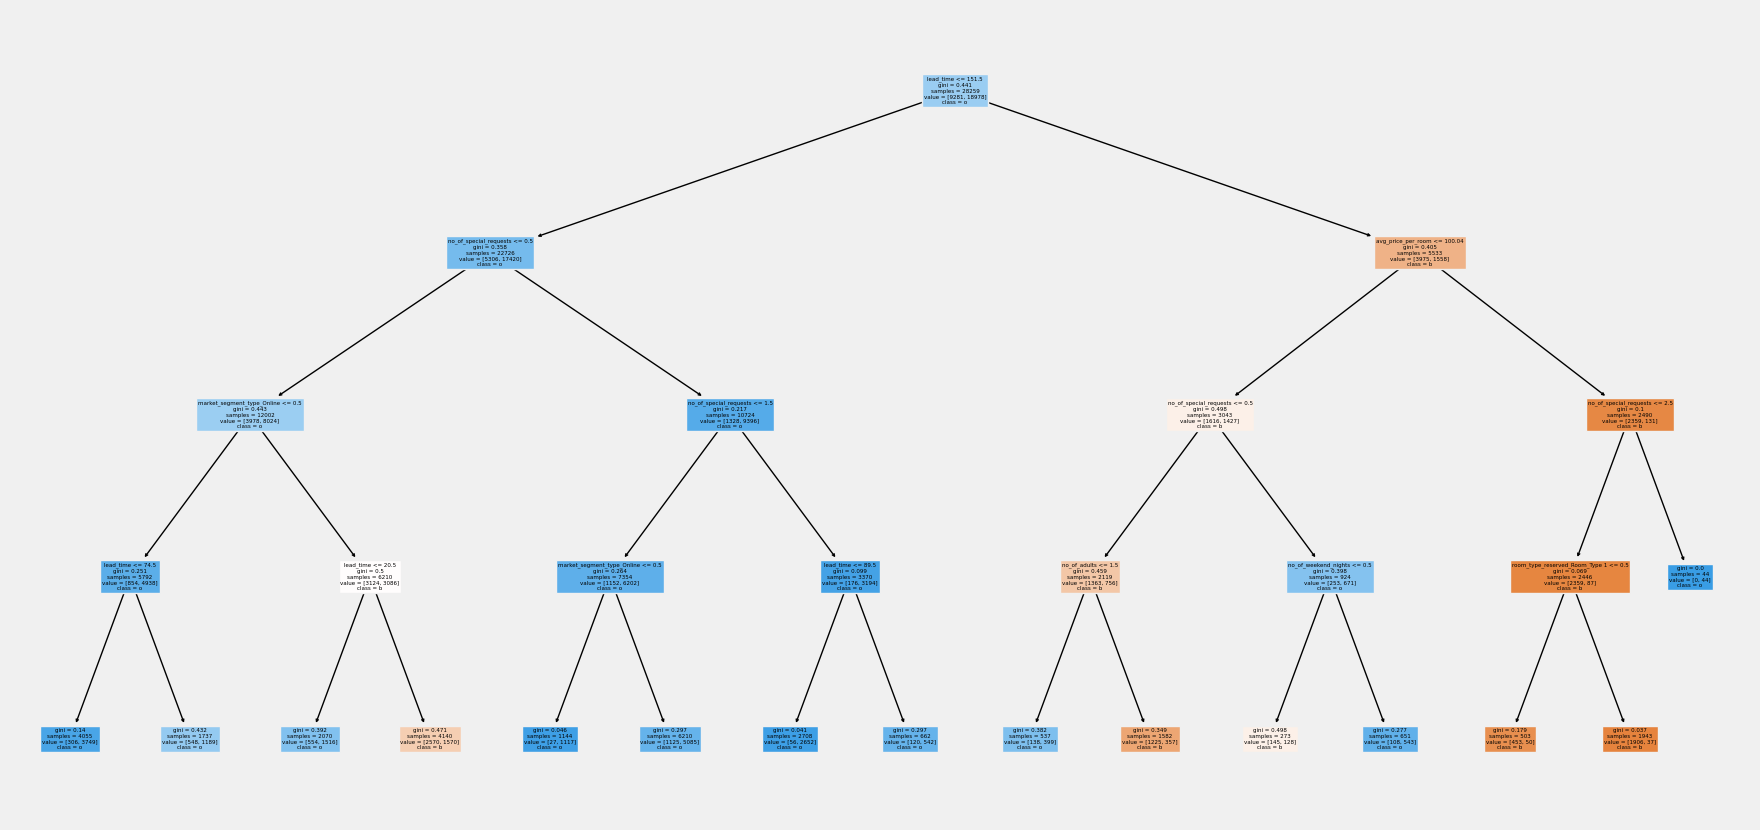

In [22]:
# import plot_tree from sklearn
from sklearn.tree import plot_tree
                           
plt.figure(figsize=(20,10))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names='booking_status', 
    filled=True
)

# Show the plot
plt.show()


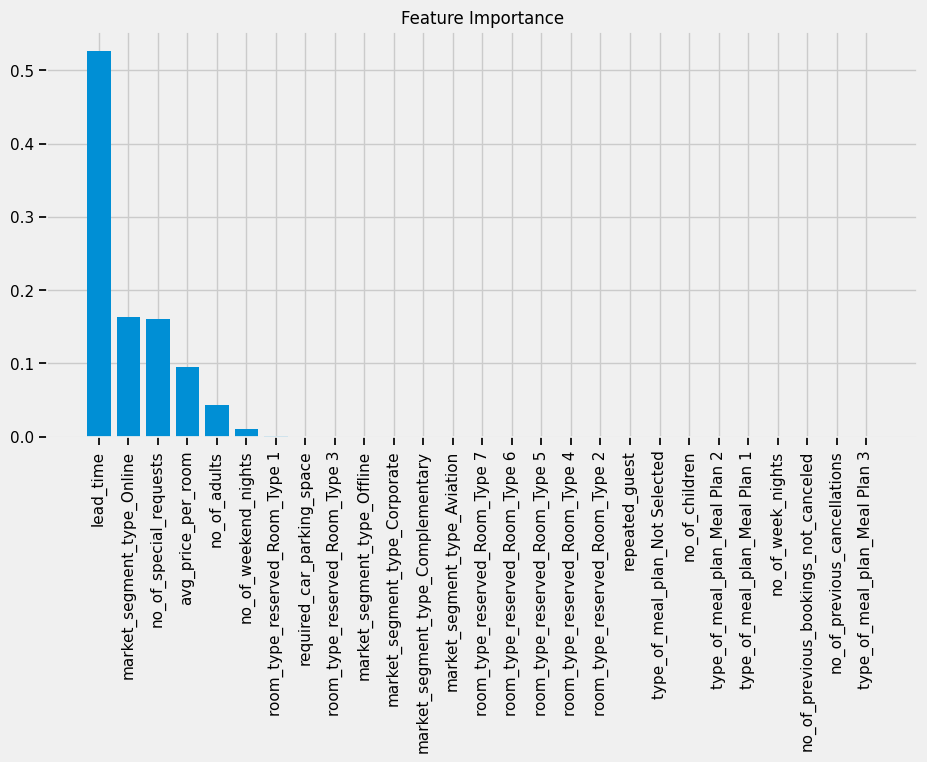

In [23]:
# now lets look at the feature importance with the original labels

# create a dataframe of the feature importance
feature_importance = pd.DataFrame(
    clf.feature_importances_,
    index = X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# plot the feature importance
plt.figure(figsize=(10, 5))
plt.bar(feature_importance.index, feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

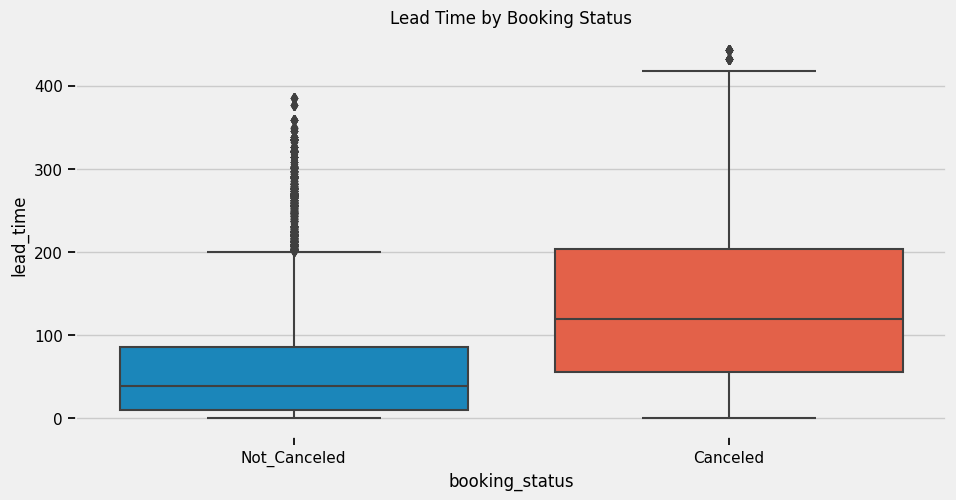

In [24]:
# compare lead time by booking status
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='booking_status',
    y='lead_time',
    data=hotels
)
plt.title('Lead Time by Booking Status')
plt.show()

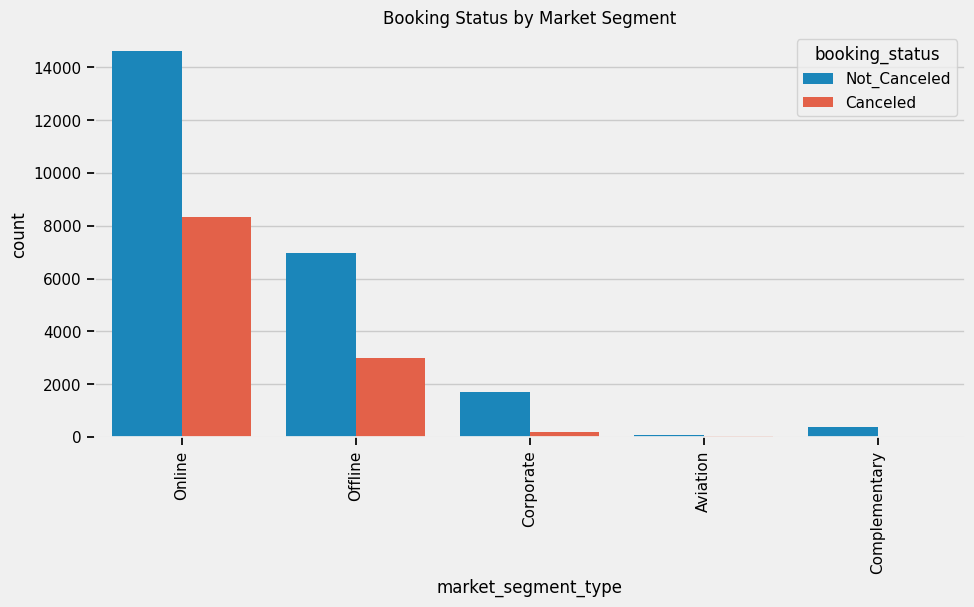

In [25]:
# show booking status by market segment
plt.figure(figsize=(10, 5))
sns.countplot(
    x='market_segment_type',
    hue='booking_status',
    data=hotels
)
plt.title('Booking Status by Market Segment')
plt.xticks(rotation=90)
plt.show()

This visualisation shows that online bookings have both a higher overall count, and a higher proportion of cancellations than other market segments.

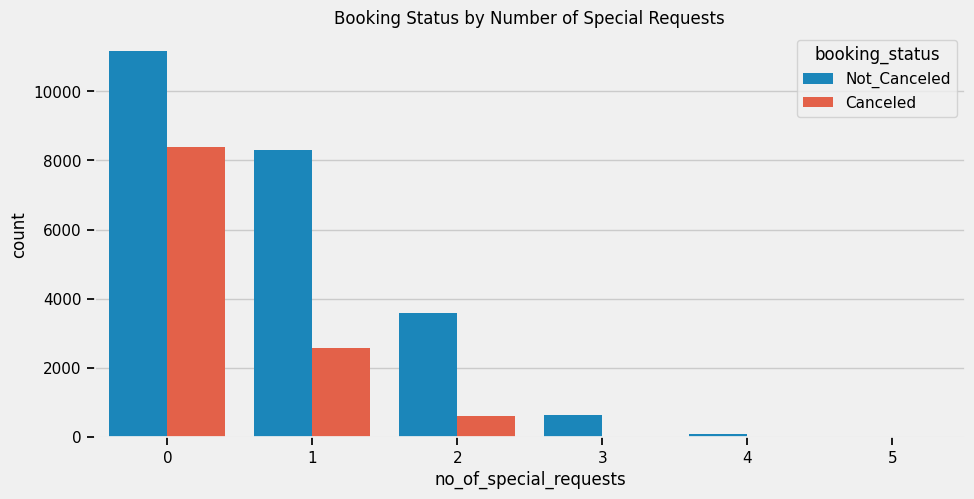

In [26]:
# show booking status by number of special requests
plt.figure(figsize=(10, 5))
sns.countplot(
    x='no_of_special_requests',
    hue='booking_status',
    data=hotels
)
plt.title('Booking Status by Number of Special Requests')
plt.show()

This visualisation shows that the number of special requests also has a significant correlation with cancellations. If a booking contains 1 or more special requests then it is far less likely to be cancelled.

The special requests themselves could be explored to understand more about this correlation.

# Recommendations

1. Introduce a small deposit for bookings with longer lead times, to aim to reduce cancellations and to reduce loss in the event of cancellations.
1. If the deposit is seen as a concern (i.e that it may put people off booking at all) you could restrict the deposit to being 
    1. for online bookings only, where it would likely have the most impact.
    1. for booking with no special requests, as that also is a key factor in reducing the likelhood of a cancellation